importing libraries


In [31]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns


In [14]:
raw_data = pd.read_csv(r"D:\Fraud detection\card_transdata.csv")

In [5]:
raw_data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [6]:
raw_data.shape

(1000000, 8)

Exploratory data analysis



In [7]:
raw_data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
raw_data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [48]:
fraud_counts =raw_data["fraud"].value_counts()

C:\Users\Sai_K\AppData\Local\Temp\ipykernel_1840\3965936377.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=["blue", "red"])


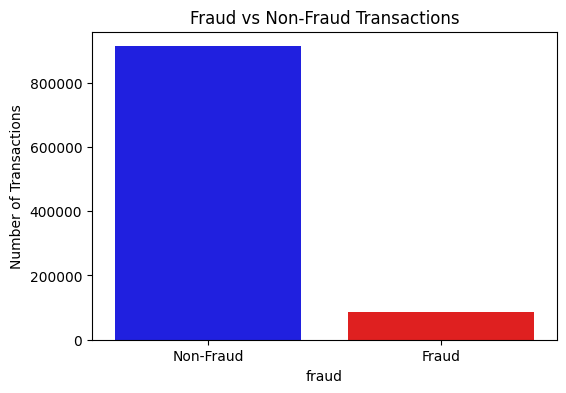

In [49]:
plt.figure(figsize=(6,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=["blue", "red"])
plt.xticks(ticks=[0, 1], labels=["Non-Fraud", "Fraud"])
plt.ylabel("Number of Transactions")
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

In [46]:
print("The fraud record",(87403/1000000)*100,"%")
print("The non-fraud record",(912597/1000000)*100,"%")

The fraud record 8.7403 %
The non-fraud record 91.2597 %


In [ ]:
fraud=raw_data["fraud"]

In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


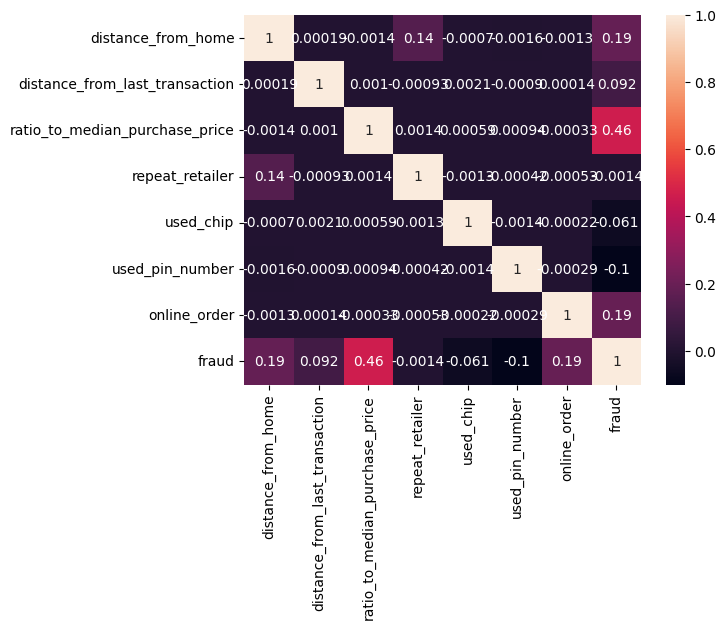

In [ ]:
corr=raw_data.corr()
sns.heatmap(corr,annot=True)
corr

feature selection and splitting

In [17]:
x=raw_data.drop(['fraud'],axis=1)
y=raw_data.fraud
x.shape

(1000000, 7)

In [92]:
x_train,x_test,y_train, y_test=train_test_split(x,y, train_size=0.8, random_state=44)
x_train.shape

(800000, 7)

In [93]:
x_test.shape

(200000, 7)

Feature Scaling

In [134]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

SMOTE+Tomek after spliting to overcome data leakage

In [135]:
from imblearn.combine import SMOTETomek
Smotetomek=SMOTETomek()
x_train, y_train = Smotetomek.fit_resample(x_train,y_train)

In [137]:
x_train.shape

(1459904, 7)

In [138]:
y_train.shape

(1459904,)

In [139]:
fraud_counts =y_train.value_counts()
fraud_counts

fraud
0.0    729952
1.0    729952
Name: count, dtype: int64

C:\Users\Sai_K\AppData\Local\Temp\ipykernel_1840\3965936377.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=["blue", "red"])


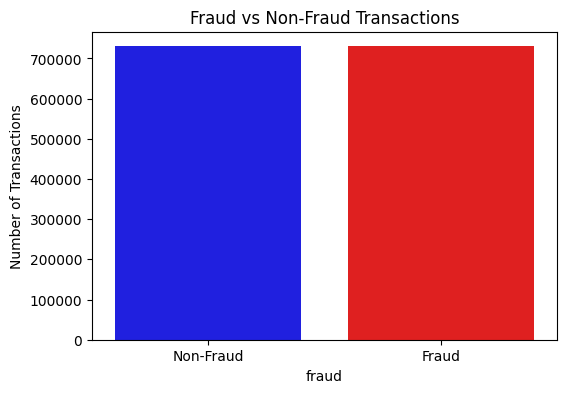

In [140]:
plt.figure(figsize=(6,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=["blue", "red"])
plt.xticks(ticks=[0, 1], labels=["Non-Fraud", "Fraud"])
plt.ylabel("Number of Transactions")
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

Training and evaluation of Logistic Regression

In [141]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model_lr=lr.fit(x_train,y_train)
model_lr

LogisticRegression()

In [142]:
y_pred=model_lr.predict(x_test)

In [143]:
print(y_pred)

[0. 1. 0. ... 0. 0. 0.]


In [144]:
y_test


582910    0.0
316332    1.0
468675    0.0
966473    0.0
390422    0.0
         ... 
132726    0.0
662347    0.0
485246    0.0
543319    0.0
262967    0.0
Name: fraud, Length: 200000, dtype: float64

In [145]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

cf=confusion_matrix(y_pred, y_test)
accuracy_lr=accuracy_score(y_pred, y_test)
precision_lr=precision_score(y_pred,y_test)
recall_lr=recall_score(y_pred,y_test)
f1_lr=f1_score(y_pred,y_test)

cf

array([[170213,    879],
       [ 12139,  16769]])

In [146]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182352
         1.0       0.58      0.95      0.72     17648

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



In [147]:
print("Accuracy of logistic regression",accuracy_lr)
print("precison of logistic regression",precision_lr)
print("recall of logistic regression",recall_lr)
print("F1 measure of logistic regression",f1_lr)



Accuracy of logistic regression 0.93491
precison of logistic regression 0.9501926563916591
recall of logistic regression 0.5800816383008164
F1 measure of logistic regression 0.7203797577111436


Training and evaluation of Decision Tree Classifier

In [162]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=4)
model_dt=model.fit(x_train,y_train)
model_dt

DecisionTreeClassifier(max_depth=4)

In [163]:
y_pred_dt=model_dt.predict(x_test)
y_pred_dt

array([0., 1., 0., ..., 0., 0., 0.], shape=(200000,))

In [164]:
print(y_test)

582910    0.0
316332    1.0
468675    0.0
966473    0.0
390422    0.0
         ... 
132726    0.0
662347    0.0
485246    0.0
543319    0.0
262967    0.0
Name: fraud, Length: 200000, dtype: float64


In [165]:
confusion_matrix(y_pred_dt,y_test)


array([[181249,    134],
       [  1103,  17514]])

In [166]:
accuracy_dt=accuracy_score(y_pred_dt,y_test)
precision_dt=precision_score(y_pred_dt,y_test)
recall_dt=recall_score(y_pred_dt,y_test)
f1_dt=f1_score(y_pred_dt,y_test)

print("Accuracy of Decison Tree classifier",accuracy_dt)
print("precison of Decison Tree classifier",precision_dt)
print("recall of Decison Tree classifier",recall_dt)
print("f1 measure of Decison Tree classifier",f1_dt)

Accuracy of Decison Tree classifier 0.993815
precison of Decison Tree classifier 0.9924070716228468
recall of Decison Tree classifier 0.9407530751463716
f1 measure of Decison Tree classifier 0.9658899765614228


Training and evaluation of KNN

In [176]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
model_knn=model.fit(x_train,y_train)

In [177]:
y_pred_knn=model_knn.predict(x_test)

In [178]:
confusion_matrix(y_pred_knn,y_test)

array([[182065,     34],
       [   287,  17614]])

In [179]:
accuracy_knn=accuracy_score(y_pred_knn,y_test)
precision_knn=precision_score(y_pred_knn,y_test)
recall_knn=recall_score(y_pred_knn,y_test)
f1_knn=f1_score(y_pred_knn,y_test)

print("Accuracy of KNeighbors Classifier",accuracy_knn)
print("precison of KNeighbors Classifier",precision_knn)
print("recall of KNeighbors Classifier",recall_knn)
print("f1 measure of KNeighbors Classifier",f1_knn)



Accuracy of KNeighbors Classifier 0.998395
precison of KNeighbors Classifier 0.9980734360834089
recall of KNeighbors Classifier 0.9839673761242389
f1 measure of KNeighbors Classifier 0.9909702101324932
